# Keras
Librería para programar redes neuronales de una manera más sencilla que con TensorFlow. Keras se encuentra en una capa de abstracción por encima de TensorFlow.

[Documentación](https://keras.io/guides/)

In [ ]:
# !pip install tensorflow
# !pip install keras

Empezamos importando librerías

In [2]:
import tensorflow as tf
from tensorflow import keras

import pandas as pd
import numpy as np

#### Clasificación

Utilizaremos el dataset de diabetes

In [3]:
df = pd.read_csv('https://raw.githubusercontent.com/npradaschnor/Pima-Indians-Diabetes-Dataset/master/diabetes.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
from sklearn.model_selection import train_test_split
X = df.drop(columns='Outcome').values
y = df['Outcome'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=40)
print(X_train.shape); print(X_test.shape)

(537, 8)
(231, 8)


In [5]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(X_train)
X_train_scal = scaler.transform(X_train)
X_test_scal = scaler.transform(X_test)

In [6]:
from tensorflow.keras.utils import to_categorical

y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

y_test.shape

(231, 2)

In [7]:
y_test

array([[0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.

Montamos la arquitectura de la red neuronal. Se va a componer de:
* **Sequential**: Para iniciar la red neuronal. No cuenta como capa.
* **Dense**: Es una hidden layer. Se compondrá de `n` neuronas y de una función de activación que se aplicará a todas las neuronas de la capa.

Recuerda que es un problema de clasificación y que por tanto la última capa se compondrá de tantas neuronas como clases tengas.

En cuanto a las funciones de activación es recomendable usar relu en las hidden layer, que tarda menos en entrenar, mientras que la ultima (output) suele ser una softmax.

In [8]:
from keras.models import Sequential
from keras.layers import Dense

model = Sequential()

model.add(Dense(500, activation='relu',input_dim=8))
model.add(Dense(100, activation='relu'))
model.add(Dense(50, activation='relu'))
model.add(Dense(2, activation='softmax'))


In [9]:
model.compile(optimizer='adam',
             loss = 'categorical_crossentropy',
             metrics=['accuracy'])

In [10]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 500)               4500      
_________________________________________________________________
dense_1 (Dense)              (None, 100)               50100     
_________________________________________________________________
dense_2 (Dense)              (None, 50)                5050      
_________________________________________________________________
dense_3 (Dense)              (None, 2)                 102       
Total params: 59,752
Trainable params: 59,752
Non-trainable params: 0
_________________________________________________________________


Entrenamos el modelo. Usamos los datos de entrenamiento. El batch_size es la cantidad de muestras que utiliza el SGD, y las epochs son las iteraciones que realiza en el entrenamiento.

In [12]:
history = model.fit(X_train_scal,
                   y_train,
                   batch_size=64,
                   epochs = 100,
                   validation_split=0.1)

Epoch 1/100
8/8 [==============================] - 1s 37ms/step - loss: 0.6714 - accuracy: 0.6460 - val_loss: 0.6890 - val_accuracy: 0.6111
Epoch 2/100
8/8 [==============================] - 0s 8ms/step - loss: 0.6469 - accuracy: 0.6729 - val_loss: 0.6907 - val_accuracy: 0.6111
Epoch 3/100
8/8 [==============================] - 0s 7ms/step - loss: 0.6278 - accuracy: 0.6749 - val_loss: 0.6523 - val_accuracy: 0.6111
Epoch 4/100
8/8 [==============================] - 0s 6ms/step - loss: 0.6083 - accuracy: 0.6936 - val_loss: 0.6456 - val_accuracy: 0.6111
Epoch 5/100
8/8 [==============================] - 0s 7ms/step - loss: 0.5832 - accuracy: 0.6998 - val_loss: 0.6081 - val_accuracy: 0.6852
Epoch 6/100
8/8 [==============================] - 0s 7ms/step - loss: 0.5600 - accuracy: 0.6998 - val_loss: 0.6120 - val_accuracy: 0.7037
Epoch 7/100
8/8 [==============================] - 0s 6ms/step - loss: 0.5494 - accuracy: 0.7081 - val_loss: 0.5478 - val_accuracy: 0.6852
Epoch 8/100
8/8 [=========

8/8 [==============================] - 0s 7ms/step - loss: 0.3431 - accuracy: 0.8385 - val_loss: 0.4474 - val_accuracy: 0.7778
Epoch 60/100
8/8 [==============================] - 0s 6ms/step - loss: 0.3355 - accuracy: 0.8592 - val_loss: 0.4697 - val_accuracy: 0.7963
Epoch 61/100
8/8 [==============================] - 0s 6ms/step - loss: 0.3254 - accuracy: 0.8613 - val_loss: 0.4339 - val_accuracy: 0.7778
Epoch 62/100
8/8 [==============================] - 0s 7ms/step - loss: 0.3405 - accuracy: 0.8654 - val_loss: 0.4342 - val_accuracy: 0.8333
Epoch 63/100
8/8 [==============================] - 0s 7ms/step - loss: 0.3274 - accuracy: 0.8571 - val_loss: 0.4742 - val_accuracy: 0.7963
Epoch 64/100
8/8 [==============================] - 0s 6ms/step - loss: 0.3220 - accuracy: 0.8778 - val_loss: 0.4535 - val_accuracy: 0.7778
Epoch 65/100
8/8 [==============================] - 0s 6ms/step - loss: 0.3160 - accuracy: 0.8716 - val_loss: 0.4643 - val_accuracy: 0.7963
Epoch 66/100
8/8 [===============

Veamos el histórico del entrenamiento, para poder representarlo posteriormente.

In [16]:
print(history.params)
print(history.epoch)
print(history.history)

{'verbose': 1, 'epochs': 100, 'steps': 8}
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99]
{'loss': [0.6714332103729248, 0.6468717455863953, 0.6278209686279297, 0.6082765460014343, 0.583166778087616, 0.5600470900535583, 0.5494205355644226, 0.5380867123603821, 0.5240230560302734, 0.5164279341697693, 0.501987874507904, 0.495084673166275, 0.4842175841331482, 0.48364317417144775, 0.4624786078929901, 0.4639962315559387, 0.46036601066589355, 0.45553916692733765, 0.4494372308254242, 0.45117101073265076, 0.44571220874786377, 0.44149771332740784, 0.4320956766605377, 0.4301375448703766, 0.4342915713787079, 0.42288869619369507, 0.41759052872657776, 0.4153832495

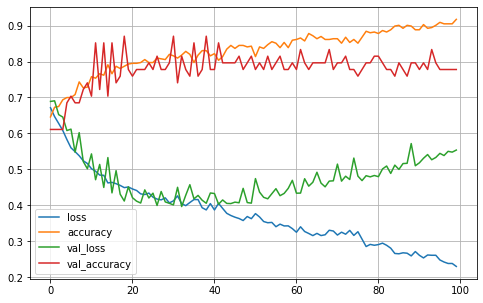

In [18]:
import matplotlib.pyplot as plt

pd.DataFrame(history.history).plot(figsize=(8,5))
plt.grid()
plt.show()

Si el modelo no ha ido bien, prueba a cambiar el learning rate, cambia de optimizador y después prueba a cambiar capas, neuronas y funciones de activación.

Ya tenemos el modelo entrenado. Medimos el desempeño

In [27]:
np.argmax(model.predict(X_train_scal),axis=1)

array([1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0,
       1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [24]:
y_train

array([[0., 1.],
       [0., 1.],
       [0., 1.],
       ...,
       [1., 0.],
       [0., 1.],
       [0., 1.]], dtype=float32)

In [23]:
from sklearn.metrics import classification_report, confusion_matrix
pred_train = np.argmax(model.predict(X_train_scal),axis=1)
print(classification_report(np.argmax(y_train,axis=1),pred_train))
confusion_matrix(np.argmax(y_train,axis=1),pred_train)

              precision    recall  f1-score   support

           0       0.92      0.94      0.93       358
           1       0.88      0.83      0.86       179

    accuracy                           0.91       537
   macro avg       0.90      0.89      0.89       537
weighted avg       0.91      0.91      0.91       537



array([[338,  20],
       [ 30, 149]], dtype=int64)

In [25]:
pred_test= np.argmax(model.predict(X_test_scal),axis=1)
print(classification_report(np.argmax(y_test,axis=1),pred_test))
confusion_matrix(np.argmax(y_test,axis=1),pred_test)

              precision    recall  f1-score   support

           0       0.75      0.83      0.79       142
           1       0.67      0.55      0.60        89

    accuracy                           0.72       231
   macro avg       0.71      0.69      0.70       231
weighted avg       0.72      0.72      0.72       231



array([[118,  24],
       [ 40,  49]], dtype=int64)

**Regresión**

In [28]:
# Cargamos datos
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

housing = fetch_california_housing()
df = pd.DataFrame(housing.data, columns = housing.feature_names)
df['target'] = housing['target']
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


En este ejemplo, preparamos nuestro conjunto de validación

Montamos el modelo. Simplemente se compondrá de una hidden layer, a la que le configuramos una capa previa de entrada de 8 neuronas (las features).

Se trata de un modelo de regresión, por lo que la capa de salida es una única neurona.

### Guardar modelo
Para guardar el modelo, en el formato de Keras (HDF5). 

### Callbacks
Son funciones predefinidas de Keras a aplicar durante el entrenamiento
Por ejemplo, `ModelCheckpoint` sirve para que el modelo se vaya guardando tras cada epoch. Así no perdemos el progreso en caso de que decidamos interrumpir el entrenamiento. El callback recibe como argumento el nombre del objeto donde queremos que se guarde el modelo entrenado.

### Early Stopping
Interrumpe el entrenamiento cuando no ve progreso en el set de validación. Para ello tiene en cuenta un numero de epochs llamado `patience`. Se puede combinar con el callback